In [ ]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
matplotlib.use('Agg')


#Data cleaning and preprocessing

Please upload the CSV here

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RestoInfo.csv to RestoInfo.csv


In [ ]:
train = pd.read_csv('RestoInfo.csv') #If not using colab then add the path over here.

In [ ]:
train.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


In [ ]:
train.isnull().sum() #dish_liked has the most missing values

Unnamed: 0                        0
name                              0
online_order                      0
book_table                        0
rate                            299
votes                             0
location                          0
rest_type                        17
dish_liked                     1107
cuisines                          0
approx_cost(for two people)      16
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

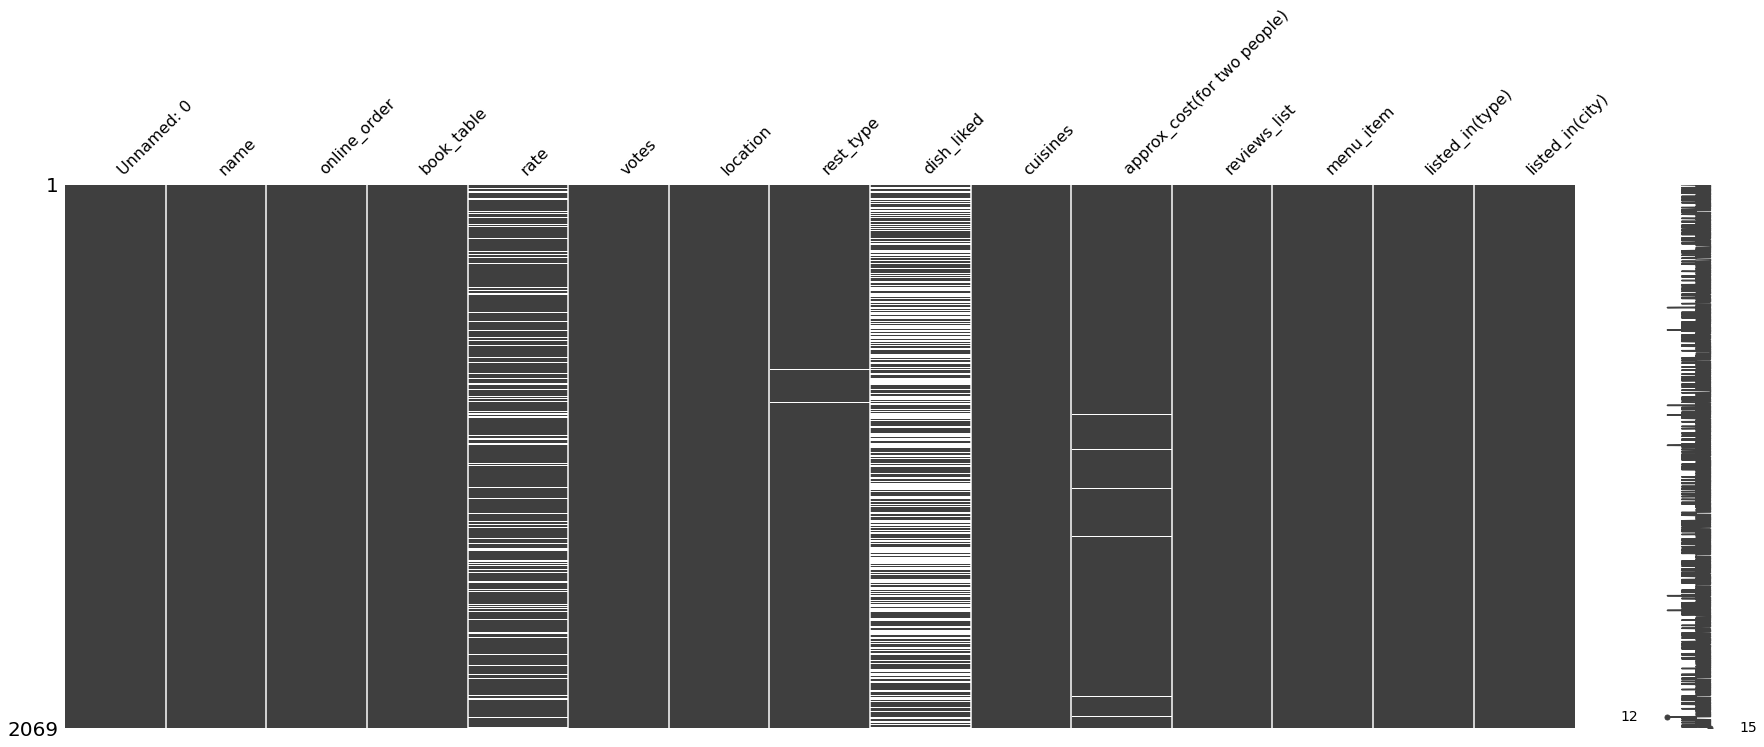

In [ ]:
missingno.matrix(train, figsize = (30,10))

In [ ]:
train.dtypes

Unnamed: 0                      int64
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
train.tail()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2064,8778,Zeeshan,Yes,No,3.8/5,214,Koramangala 7th Block,Casual Dining,"Rolls, Kathi Roll, Mutton Roll, Chicken Roll, ...","North Indian, Kebab, Biryani, Rolls",700,"[('Rated 1.0', ""RATEDn Pathetic service .we v...",[],Delivery,BTM
2065,18086,Zaica Dine & Wine,Yes,Yes,4.0/5,1013,Indiranagar,Casual Dining,"Chocolate Pani Puri, Butter Chicken, Gajar Hal...",North Indian,"1,200","[('Rated 5.0', ""RATEDn This place is located ...",[],Delivery,Indiranagar
2066,46112,Murphy's Brewhouse - The Paul Bangalore,No,Yes,4.3 /5,2039,Domlur,"Pub, Microbrewery","Chicken Bruschetta, Tandoori Chicken, Veggie P...","Continental, North Indian, Finger Food","1,700","[('Rated 4.0', 'RATEDn Service - 4/5, Taste -...",[],Pubs and bars,Old Airport Road
2067,10808,Cee Yem,No,No,NaN,0,BTM,Quick Bites,NaN,"South Indian, Kerala, North Indian",300,[],[],Dine-out,BTM
2068,28875,Cauvery Fast Food,No,No,3.2 /5,4,Ejipura,Quick Bites,NaN,Chinese,150,"[('Rated 3.0', 'RATEDn Small place with minim...",[],Dine-out,Koramangala 4th Block


In [ ]:
train.columns

Index(['Unnamed: 0', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
train.shape

(2069, 15)

In [ ]:
train = train.drop(columns = ['Unnamed: 0']) #No point of keeping a column whose description is not given.

In [ ]:
train.describe()

,votes
count,2069.000000
mean,276.048333
std,673.916908
min,0.000000
25%,7.000000
50%,43.000000
75%,210.000000
max,7854.000000


In [ ]:
train.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


In [ ]:
train.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
train = train.rename(columns={"approx_cost(for two people)" : "costfortwo"},)

In [ ]:
train = train.rename(columns={"listed_in(type)" : "category_type"})

In [ ]:
train = train.rename(columns={"listed_in(city)" : "city"})

In [ ]:
train.costfortwo

0         200
1         200
2         230
3         NaN
4         800
        ...  
2064      700
2065    1,200
2066    1,700
2067      300
2068      150
Name: costfortwo, Length: 2069, dtype: object

In [ ]:
train.costfortwo.isnull().sum()

16

In [ ]:
train = train.dropna(subset=['costfortwo'])

In [ ]:
train.costfortwo.isnull().sum()

0

After the observation of the datatypes, we can see that the most of them are object and not integer. approx_cost should be an integer because it represents the cost of the meal for two. 

Also it will be easier to rename few of the columns for ease

In [ ]:
train.costfortwo = train.costfortwo.apply(lambda x: int(x.replace(',','')))
train.costfortwo = train.costfortwo.astype('int')

# **Visualisation**

### Feature - Name

we will try to see which is the biggest resturant chain and which is the best resturant chain in Banglore.

In [ ]:
train.name.value_counts().head()

Lassi Shop          6
Apsara Ice Cream    6
Hottey Smokey       5
McDonald's          5
Ramji Chaiwale      5
Name: name, dtype: int64

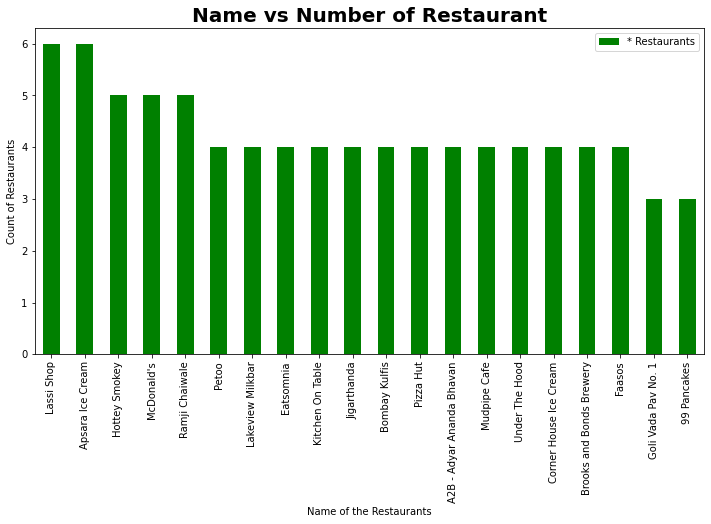

In [ ]:
plt.figure(figsize = (12,6))
ax = train.name.value_counts()[:20].plot(kind = 'bar', color= 'green')
ax.legend(['* Restaurants'])
plt.xlabel("Name of the Restaurants")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')
plt.savefig('Name vs Number of Restaurant')

- The feature name shows us the name of the restaurants in Bangalore and the number of branches that they operate. Lassi Shop and Apsara Ice Cream are the ones with the maximum number of branches, i.e., 6. 

- It will be worth seeing the correlation between the number of branches vs most popular localities in Bangalore.


In [ ]:
train.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costfortwo,reviews_list,menu_item,category_type,city
0,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
4,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield
5,Bistro Oui,Yes,Yes,4.1 /5,402,Koramangala 5th Block,"Cafe, Bar","Veg Burger, Pork Ribs, Pizza, Chicken Sandwich...","Cafe, Continental, Salad, Steak",1200,"[('Rated 4.0', 'RATEDn Funny & TastynnWe visi...",[],Pubs and bars,Koramangala 5th Block


### Feature - Category_Type

In [ ]:
train.category_type.value_counts().head()

Delivery              1039
Dine-out               734
Desserts               121
Cafes                   60
Drinks & nightlife      46
Name: category_type, dtype: int64

- This feature is representing the types of service that the customers use the most.

Text(0.5, 1.0, 'Category vs count')

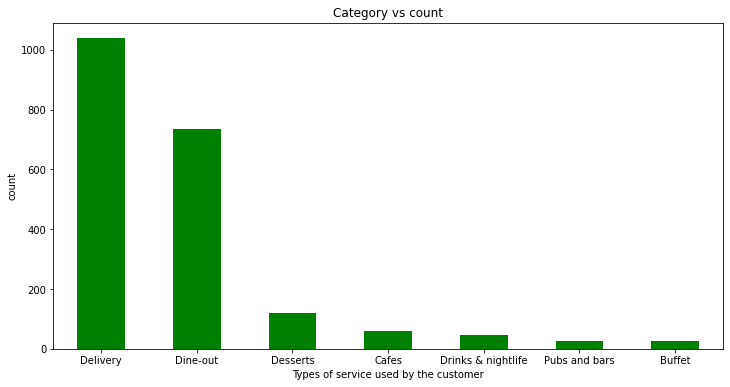

In [ ]:
plt.figure(figsize = (12,6))
ax = train['category_type'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5, color = 'green')
ax.set_ylabel('count')
plt.xlabel("Types of service used by the customer")
ax.set_title('Category vs count')

- 1039 customers use delivery, which is the most used service by the customers. This shows a very good observation that if the restaurants are providing delivery service then the restaurants have a higher chance of expanding their business. This feature is clearly attracting the customers.


### Feature - Location

In [ ]:
train.location.value_counts().head()

BTM                      223
JP Nagar                  99
HSR                       97
Koramangala 5th Block     97
Marathahalli              88
Name: location, dtype: int64

In [ ]:
def plot_location_graph(train, title):
   
    loc_count = train
    plt.figure(figsize=(20,10))
    sns.barplot(loc_count.index, loc_count.values, alpha=0.8, color = 'green')
    plt.title(title, fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

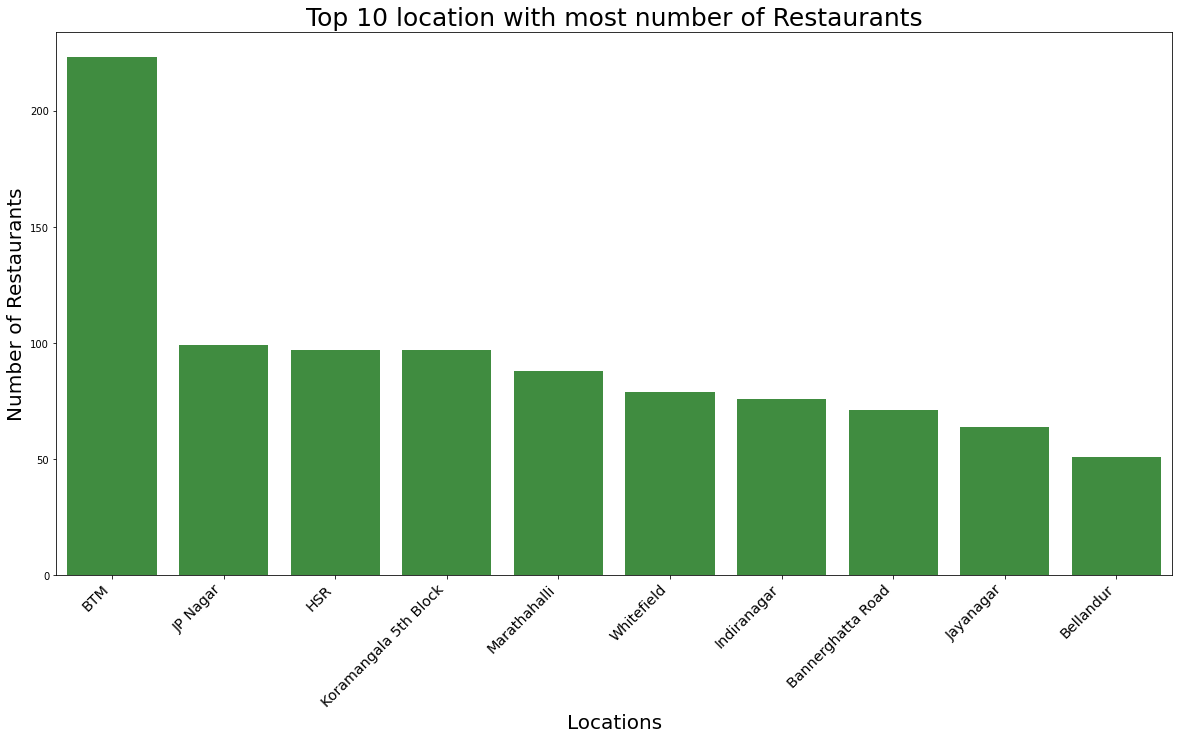

In [ ]:
plot_location_graph(train['location'].value_counts()[:10,], 'Top 10 location with most number of Restaurants')

- Location of the restaurant plays a very important role for the business to grow. The bar plot states that BTM, JP nagar and HSR are the three locations which have the maximum number of restaurants.

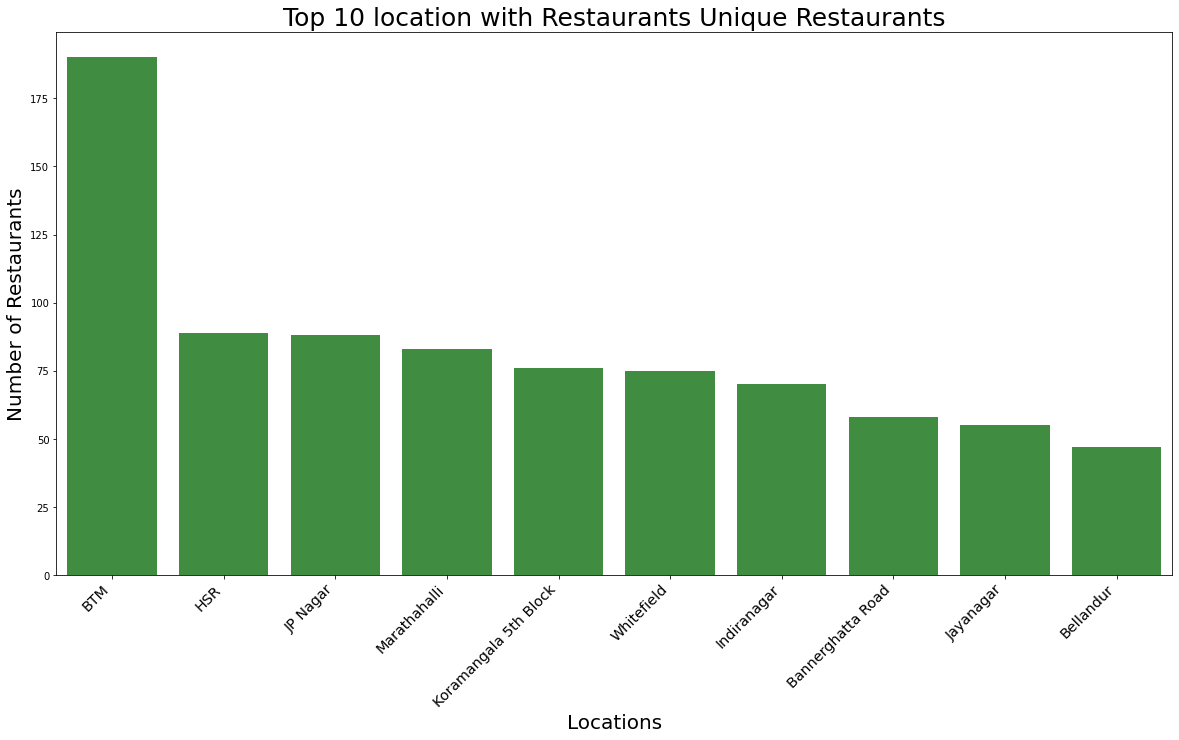

In [ ]:
plot_location_graph(train.groupby('location')['name'].nunique().sort_values(ascending=False)[:10,], 'Top 10 location with Restaurants Unique Restaurants')

In [ ]:
print('Total {} unique Restaurants are in Bangalore'.format(len(train['name'].unique())))

Total 1655 unique Restaurants are in Bangalore


If we look at the bar plot above, we can see BTM has the most unique restaurants followed by HSR and JP nagar. 

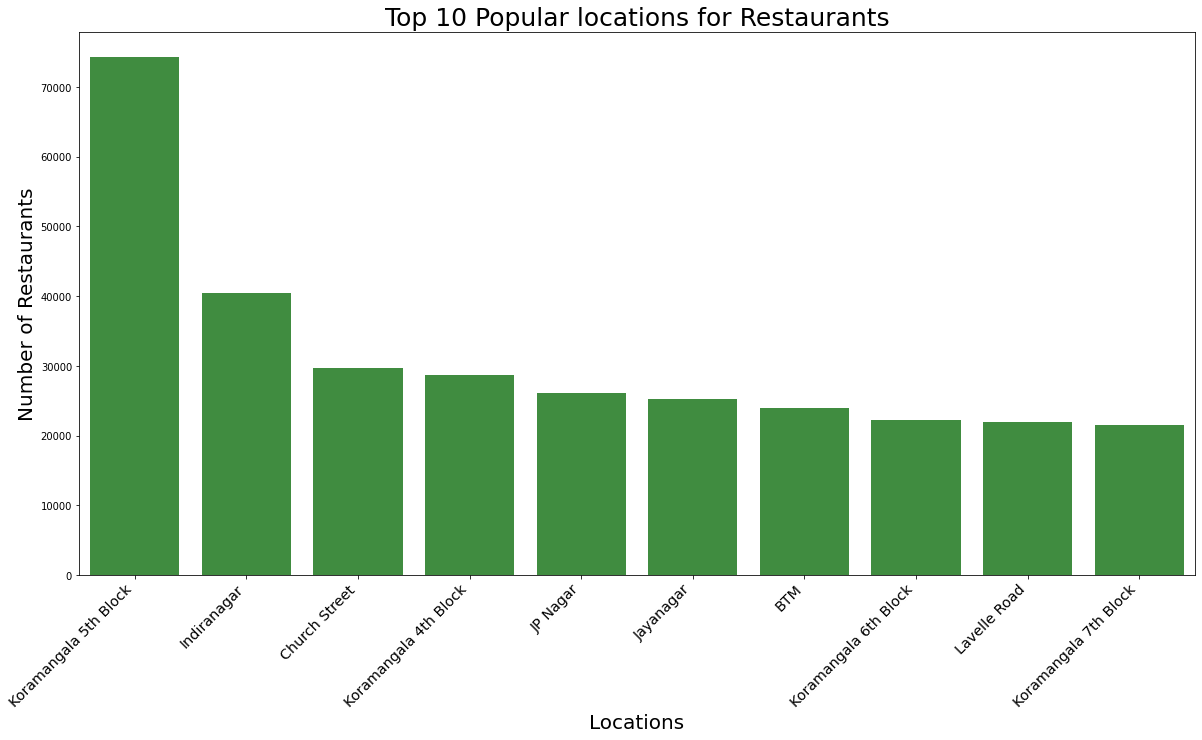

In [ ]:
plot_location_graph(train.groupby('location')['votes'].sum().sort_values(ascending=False)[:10,], 'Top 10 Popular locations for Restaurants')

Another factor that is very important to draw conclusions and make an observation is popularity. 
Popularity is a very important metric to push the chances of profit for your restaurant. Koramangala is one of the most famous spots for foodies and a restaurant. It can attract a lot of crowds if the idea is pitched well.


### Feature - Costfortwo

In [ ]:
train.costfortwo.value_counts().head()

300    299
400    255
500    209
200    195
600    150
Name: costfortwo, dtype: int64

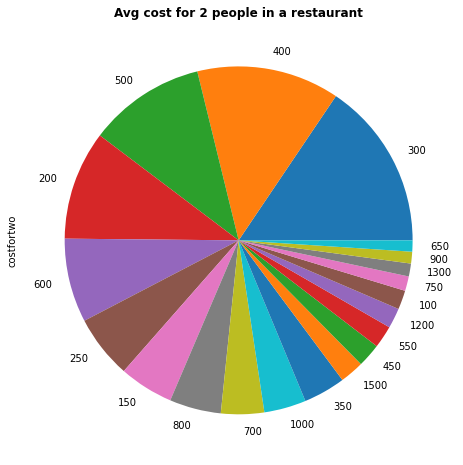

In [ ]:
plt.figure(figsize=(12,8))
train['costfortwo'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost for 2 people in a restaurant', weight = 'bold')
plt.show()

Average cost for 2 people in banglore is 300 INR.

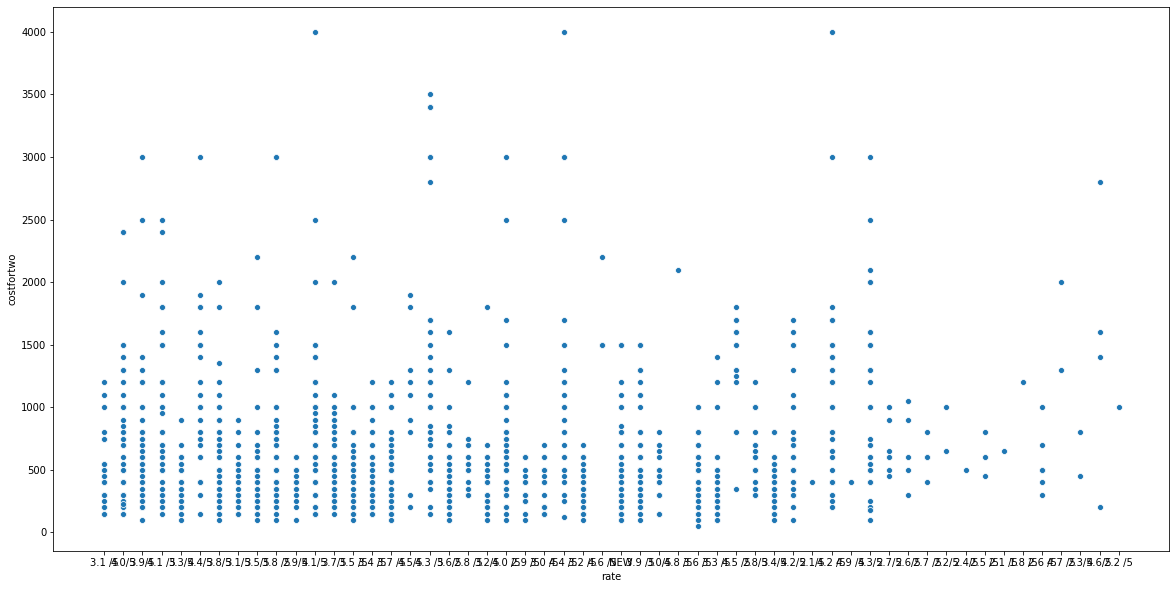

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rate',y='costfortwo',data=train)
plt.show()

- If we see the scatter plot above, we can see that most of the restaurants offer the range of 1500 INR for two which is a fair amount. This will be the ideal range to consider in the start for the best results.

### Feature - **dish_liked**

In [ ]:
train.dish_liked.value_counts()

Biryani                                                                                7
Paratha                                                                                5
Appam, Chicken Curry, Passion Fruit Juice, Crepe                                       4
Chicken Biryani                                                                        4
Butter Naan, Mocktails, Cocktails, Sunday Brunch, Waffles, Gulab Jamun, Veg Platter    3
                                                                                      ..
Waffles, Pasta Alfredo, Hot Coffee                                                     1
Butter Beer, Pasta, Fries, Burgers, Exotic Veg Pizza, Potato Wedges, Veggie Pizza      1
Appam, Sea Food, Fry Prawns, Dal Fry, Chicken Curry, Fish, Murgh Ghee Roast            1
Chicken Kebab, Butter Chicken, Papdi Chaat, Pizza, Dahipuri, Rice Kheer, Beer          1
Club Chicken Sandwich, Sandwiches, Coffee, Pie, Burgers, Carrot Cake, Cheesecake       1
Name: dish_liked, Len

Big chunk of a null value exisits in this feature so lets create a new dataframe to drop the null values from it and get some visulization done.

In [ ]:
train.dish_liked.isnull().sum()

1101

In [ ]:
dish_liked_temp = train[train.dish_liked.notnull()]
dish_liked_temp.dish_liked = dish_liked_temp.dish_liked.apply(lambda x:x.lower().strip())

In [ ]:
dish_liked_temp.dish_liked.isnull().sum()

0

In [ ]:
dish_count = []
for x in dish_liked_temp.dish_liked:
  for a in x.split(','):
    a = a.strip() #White spaces should be removed for a more accurate result
    dish_count.append(a)

Text(0.5, 1.0, 'Top 10 dishes liked in banglore')

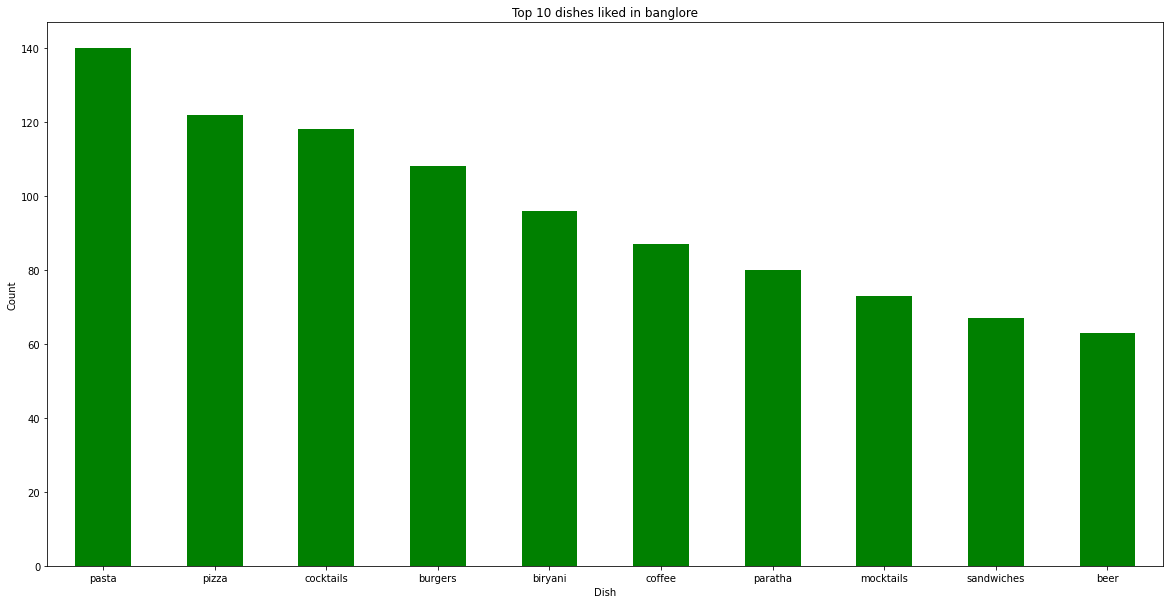

In [ ]:
plt.figure(figsize=(20,10))
pd.Series(dish_count).value_counts()[:10].plot(kind = 'bar',rot = 0, width = 0.5, color = 'green')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.title('Top 10 dishes liked in banglore')

- Bangalore is a place of youth and fast food is a popular choice. Pasta is the most liked dish in Bangalore, followed by pizza and cocktails.

- Another observation is that beer is the least liked item in the list and if we correlate this with the Drinks & nightlife then it is clear that it is not worth it to invest in a bar or a nightclub.

### Feature - Rate

In [ ]:
def clean_data(train):
    
    train['rate'] = train['rate'].replace('NEW',np.NaN)
    train['rate'] = train['rate'].replace('-',np.NaN)
    train.dropna(how = 'any', inplace = True)
    train['rate'] = train.loc[:,'rate'].replace('[ ]','',regex = True)
    train['rate'] = train['rate'].astype(str)
    train['rate'] = train['rate'].apply(lambda r: r.replace('/5',''))
    train['rate'] = train['rate'].apply(lambda r: float(r))
    
    return clean_data

In [ ]:
clean_data(train)

<function __main__.clean_data>

In [ ]:
train.rate.value_counts()

4.1    119
3.8    115
4.0    114
3.9    112
4.2     80
4.3     75
3.7     59
4.4     56
3.6     38
4.5     24
2.8     22
3.5     21
3.4     16
2.9     14
3.1     13
3.0      9
4.6      8
2.6      8
2.7      8
3.3      6
3.2      4
2.2      3
4.7      2
2.1      2
2.3      2
4.9      1
2.5      1
4.8      1
1.8      1
Name: rate, dtype: int64

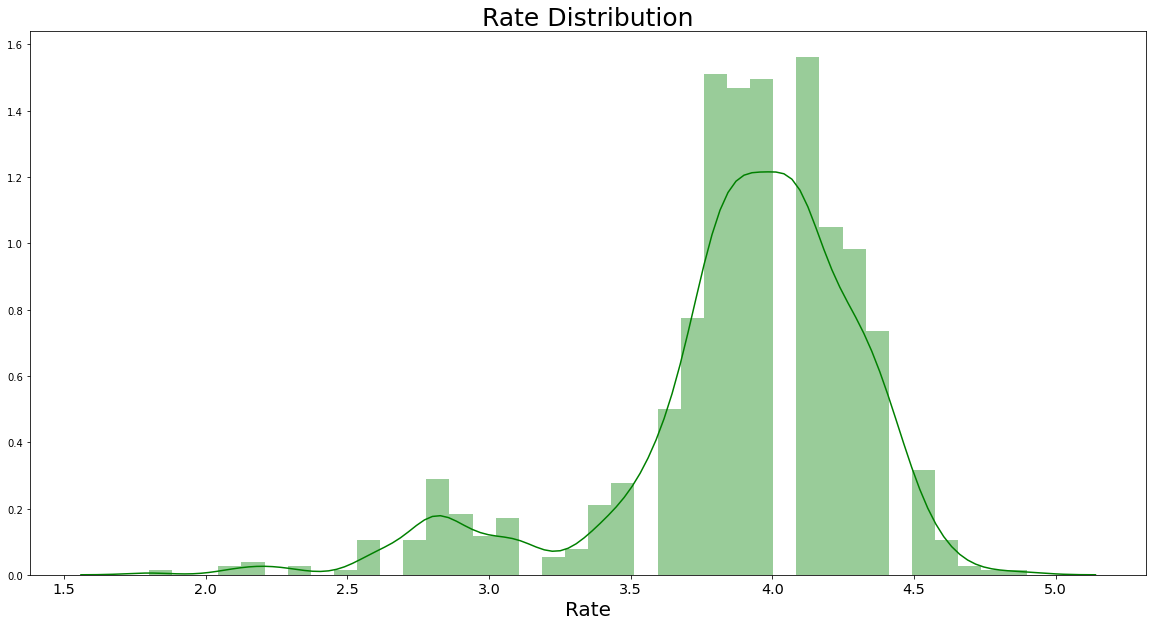

In [ ]:
plt.figure(figsize=(20,10),)
sns.distplot(train['rate'], color= 'green')
plt.title('Rate Distribution', fontsize=25,)
plt.xlabel('Rate', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()


In [ ]:
print('First Quantile of rate distribution is {} '.format(np.quantile(train['rate'], 0.25)))
print('Second Quantile of rate distribution is {} '.format(np.quantile(train['rate'], 0.50)))
print('Third Quantile of rate distribution is {} '.format(np.quantile(train['rate'], 0.75)))
print('Forth Quantile of rate distribution is {} '.format(np.quantile(train['rate'], 1)))
print('Average Rating is {} '.format(train['rate'].mean()))

First Quantile of rate distribution is 3.8 
Second Quantile of rate distribution is 4.0 
Third Quantile of rate distribution is 4.2 
Forth Quantile of rate distribution is 4.9 
Average Rating is 3.8904710920770946 


- Approximately 50% of the distribution lies in between 3.8 and 4.2 with an average rating of 4.0.
- Rating of a restaurant plays a major role in general because it is one of the main factors to be considered before visiting a restaurant. 
- A good rating will clearly attract more customers and it is very important to maintain it to run a successful business.


Now lets try to see a correlation in between rating and number of votes. We can use Joint Plot for this.

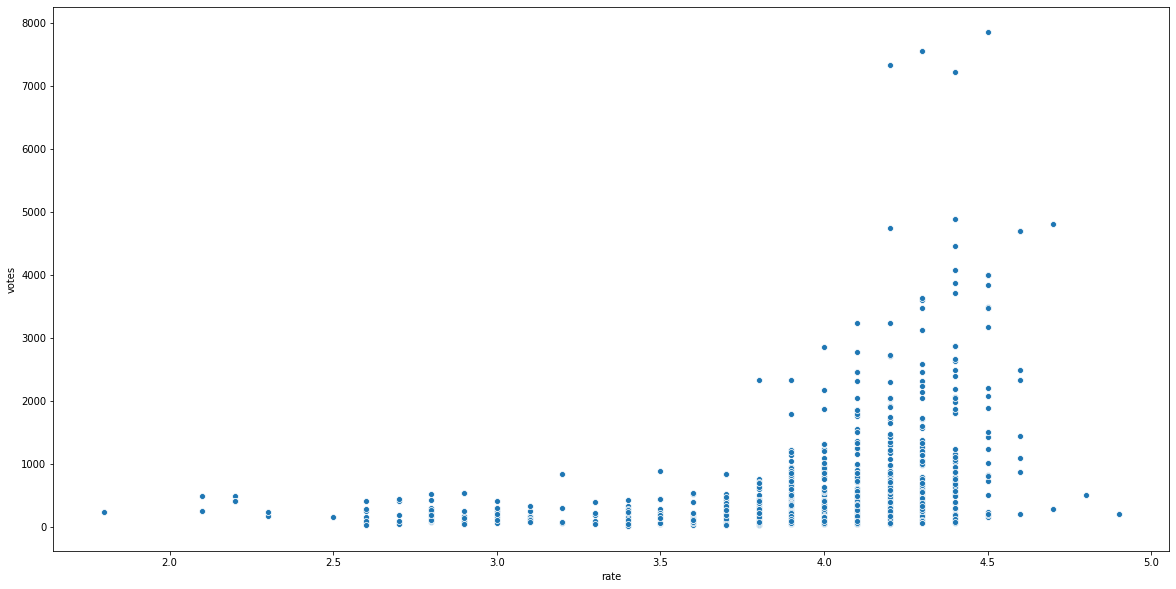

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rate',y='votes',data=train)
plt.show()

From the scatter plot, we can clearly see that the restuarant which received more votes has a higher rating.

### Feature - online_order

Yes    648
No     286
Name: online_order, dtype: int64


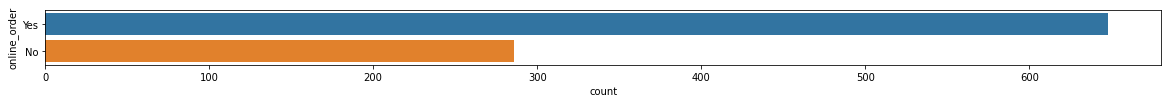

In [ ]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="online_order", data=train);
print(train.online_order.value_counts())

If we look at the number, 648 restaurants are accepting online orders and on the other hand 286 are not accepting it.

Text(0.5, 1.0, 'rate vs online order')

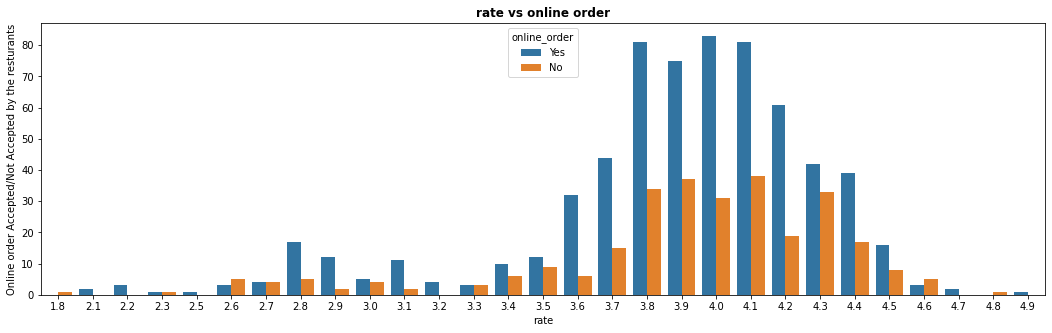

In [ ]:
plt.figure(figsize = (18,5))
sns.countplot(x=train['rate'], hue = train['online_order'])
plt.ylabel("Online order Accepted/Not Accepted by the resturants")
plt.title("rate vs online order",weight = 'bold')

- Online order impacts the ratings as per the observations made above.
- The restaurants accepting orders online are having a better rating as compared to the restaurants which are not providing the online order service

### Feature - rest_type

Rest_type vs rate

In [ ]:
train.rest_type.value_counts()

Casual Dining                    297
Quick Bites                      206
Cafe                              85
Dessert Parlor                    50
Casual Dining, Bar                29
Pub                               24
Delivery                          21
Food Court                        17
Lounge                            16
Takeaway, Delivery                16
Bar                               16
Fine Dining                       12
Pub, Casual Dining                10
Bakery                            10
Bar, Casual Dining                 8
Casual Dining, Cafe                8
Casual Dining, Microbrewery        7
Sweet Shop, Quick Bites            6
Cafe, Bakery                       6
Bakery, Quick Bites                6
Cafe, Casual Dining                6
Dessert Parlor, Cafe               6
Cafe, Quick Bites                  5
Beverage Shop, Quick Bites         5
Fine Dining, Bar                   5
Microbrewery, Casual Dining        4
Casual Dining, Pub                 4
B

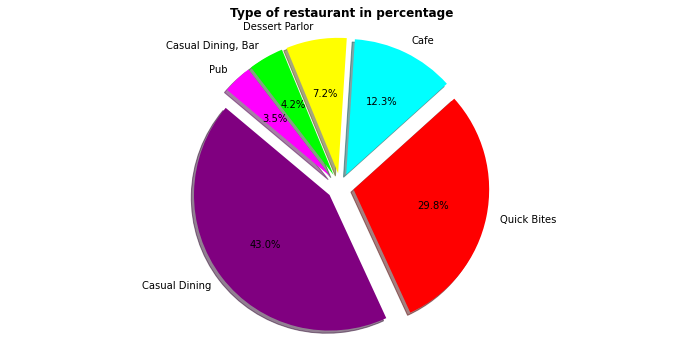

In [ ]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

plt.figure(figsize = (12,6))
names = train['rest_type'].value_counts()[:6].index
values = train['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

- We have the most frequently visited Restaurant type - Quickbites


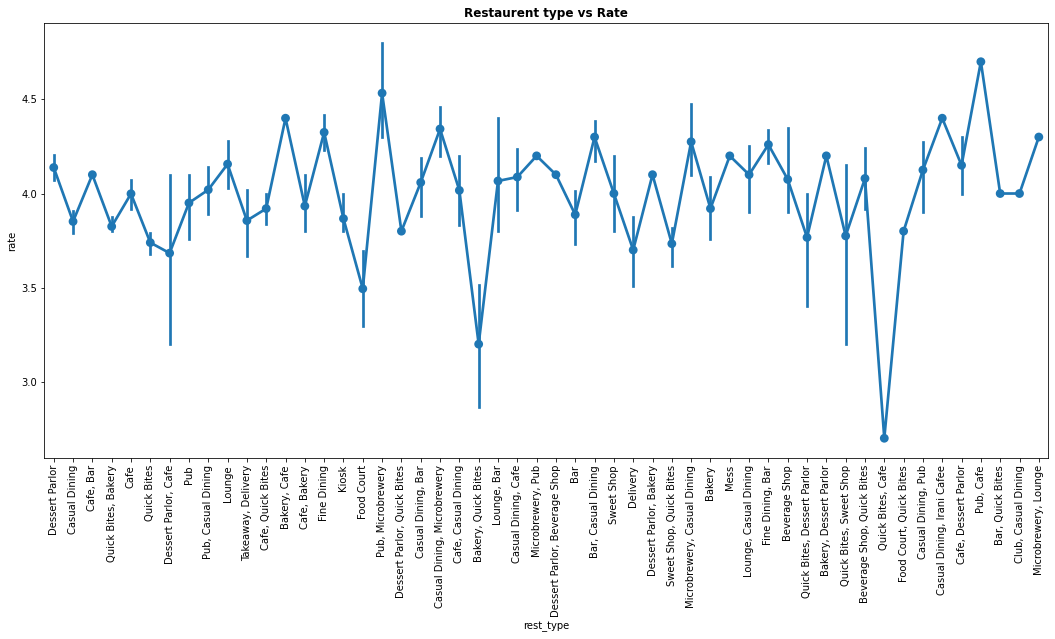

In [ ]:
ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=train["rest_type"], y=train["rate"], data=train)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

### Feature - Cuisines

In [ ]:
train.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costfortwo,reviews_list,menu_item,category_type,city
2,Rock Stone Ice Cream Factory,Yes,No,4.0,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
4,Rayalaseema Chefs,Yes,Yes,3.9,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield
5,Bistro Oui,Yes,Yes,4.1,402,Koramangala 5th Block,"Cafe, Bar","Veg Burger, Pork Ribs, Pizza, Chicken Sandwich...","Cafe, Continental, Salad, Steak",1200,"[('Rated 4.0', 'RATEDn Funny & TastynnWe visi...",[],Pubs and bars,Koramangala 5th Block
7,Hotel Tom's Restaurant,Yes,Yes,4.4,712,Richmond Road,Casual Dining,"Appam, Sea Food, Fry Prawns, Dal Fry, Chicken ...","Mangalorean, Seafood, Chinese, North Indian",1000,"[('Rated 4.0', ""RATEDn Quite an old place to ...",[],Dine-out,Brigade Road
8,Munchies,Yes,No,3.9,64,Brigade Road,"Quick Bites, Bakery","Burgers, Sandwiches, Momos, Chicken Seekh Roll...","Fast Food, Bakery",250,"[('Rated 4.0', 'RATEDn I am glad i found this...","['Spicy Mixed Vegetable Club Sandwich', 'Chick...",Delivery,Brigade Road


In [ ]:
cuisines_temp = train[train.cuisines.notnull()]
cuisines_temp.cuisines = dish_liked_temp.cuisines.apply(lambda x:x.lower().strip())

In [ ]:
cuisines_count = []
for x in cuisines_temp.cuisines:
  for b in x.split(','):
    b = b.strip() #White spaces should be removed for a more accurate result
    cuisines_count.append(b)

In [ ]:
cuisines_temp.cuisines.isnull().sum()

0

Text(0.5, 1.0, 'Top 10 dishes liked in banglore')

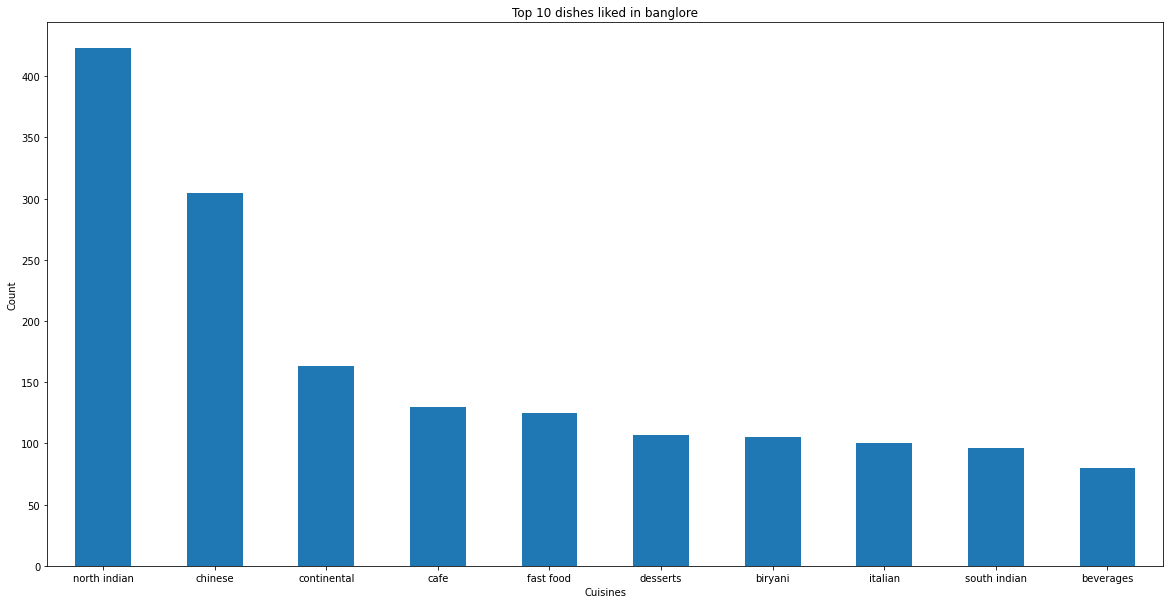

In [ ]:
plt.figure(figsize = (20,10))
pd.Series(cuisines_count).value_counts()[:10].plot(kind = 'bar',rot = 0, width = 0.5)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 10 dishes liked in banglore')

North Indian cuisine is the most liked cuisine in Bangalore and having a restaurant which offers North Indian food as well can be a great point.

#Conclusion

Main observations and insights -

- Delivery is the most used service by the customers. This feature is very essential and will attract more customers.
- Popularity is a very important metric to push the chances of profit for your restaurant. Koramangala is one of the most famous spots for foodies and a restaurant. It can attract a lot of crowds if the idea is pitched well.
- The range of 1500 INR for two should be the ideal range to consider in the start for the best results.
- fast food is a popular choice. Pasta is the most liked dish in Bangalore, followed by pizza and cocktails. These dishes should be served in the restaurant 

- Beer is the least liked item in the list and if we correlate this with the Drinks & nightlife then it is clear that it is not worth it to invest in a bar or a nightclub.

- Rating of a restaurant plays a major role. It should be always maintained on higher level. 

- Restuarants which received more votes have a higher rating. Feedback forms and reviews should always be encouraged.

- Online order impacts the ratings as per the observations. This service will work along with another service which is delivery. Delivery is the most used service according to the data and online order work hand to hand with it.

- North Indian cuisine is the most liked cuisine in Bangalore. It should be in the menu to attract more customers.
